#### 超参数设置对模型学习的影响

+ 输出$y$与输出$x$之间的真实函数关系：
$$ y = x\sin(4x) $$
+ 在区间$[-3,3]$之间随机抽样100个均匀分布的点作为训练数据集的输入$x$
+ 训练集的输出$y$是添加了高斯噪声的数据：
$$ y = x\sin(4x) + \delta, \qquad \delta \sim N(0,0.25) $$
+ 采用3组超参数学习高斯核函数支持向量机回归器
    - $\gamma=0.1, C=100, \epsilon=0.1$
    - $\gamma=1, C=100, \epsilon=0.1$
    - $\gamma=100, C=1000, \epsilon=0.01$
+ 观察回归器的模型学习结果
    - <font color=red>红色</font>的‘+’代表训练数据
    - <font color=sienna>浅棕色</font>的曲线是真实的函数
    - <font color=blue>蓝色</font>曲线是模型学习到的函数

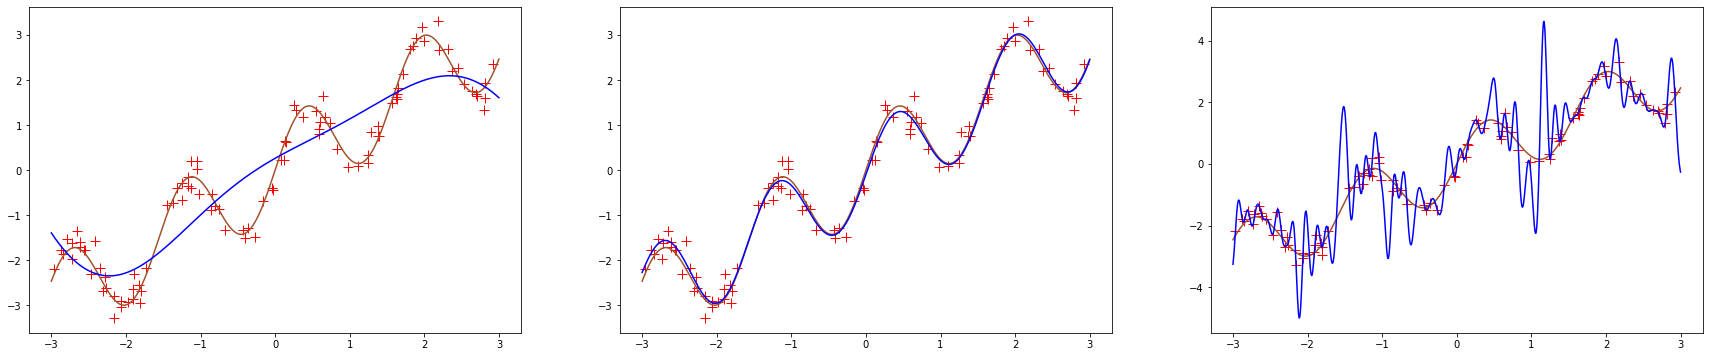

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

rnd = np.random.RandomState(42)
x = rnd.uniform(-3,3,size=100)
y_no_noise = np.sin(4*x) + x
y = y_no_noise + rnd.normal(size=len(x))/4

xx = np.linspace(-3, 3, 1000).reshape(-1, 1)
yy = np.sin(4*xx) + xx

fig, axes = plt.subplots(1,3,figsize=(30,6))
for gamma,C,epsilon,ax in zip([0.1,1,100],[100,100,1000],[0.1,0.1,0.01],axes):
    ax.plot(x,y,'r+',markersize=10); ax.plot(xx,yy,'sienna')
    
    svr = SVR(kernel='rbf',gamma=gamma,C=C,epsilon=epsilon).fit(x.reshape(-1,1), y)
    predict_y = svr.predict(xx)
    ax.plot(xx,predict_y,'b')

plt.show()